In [1]:
import pandas as pd
import numpy as np
import os
from env import host, user, password
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
import env
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import scipy
import sklearn.linear_model
import sklearn.preprocessing
import warnings
warnings.filterwarnings("ignore")
import wrangle
import scipy.stats as stats

### 1. Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

### 2. Answer those questions through a mix of statistical tests and visualizations.

### 3. Bonus: Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.

## Before I get further down any rabbit hole, let's scale and split this data please

The wrange_zillow function is pretty good, just needs to be added to scale and split i think.

# NOTES TO THE EFFECT:
I have moved a number of operations from the wrangle function to the clean_and_prep function--i want the wrangle function to be a simple wrapper for all the other functions in the script
    - I'm expecting errors as a result that will need troubleshooting

In [2]:
df = wrangle.wrangle_zillow()

In [3]:
df.shape

(69665, 22)

In [4]:
df = wrangle.clean_and_prep_data(df)
df.shape

(61272, 26)

In [5]:
df.head().T

,1,2,3,4,5
parcelid,17052889,14186244,12177905,10887214,17143294
bathrooms,1.0,2.0,3.0,3.0,2.0
bedrooms,2.0,3.0,4.0,3.0,3.0
condition,6.0,6.0,8.0,8.0,6.0
sq_ft,1465.0,1243.0,2376.0,1312.0,1492.0
full_baths,1.0,2.0,3.0,3.0,2.0
latitude,34449266.0,33886168.0,34245180.0,34185120.0,34230044.0
longitude,-119281531.0,-117823170.0,-118240722.0,-118414640.0,-118993991.0
lot_size,12647.0,8432.0,13038.0,278581.0,903.0
census_tract,61110010.023006,60590218.022012,60373001.001006,60371236.012,61110053.062009


# COMPLETE AND RUN YOUR CLEAN_AND_PREP FUNCTION BEFORE PROCEEDING FOR CLARITY
#### adding it inside of 'wrangle', or as a separate step?

In [6]:
df.dtypes

parcelid                 int64
bathrooms              float64
bedrooms               float64
condition              float64
sq_ft                  float64
full_baths             float64
latitude               float64
longitude              float64
lot_size               float64
census_tract           float64
city_id                float64
zip                    float64
rooms                  float64
structure_value        float64
tax_value              float64
year_assessed          float64
land_value             float64
tax_amount             float64
logerror               float64
county                  object
age                      int64
sq_ft_per_bathroom     float64
sq_ft_per_bedroom      float64
sq_ft_per_room         float64
has_half_bath             bool
age_bin               category
dtype: object

In [7]:
for col in df.columns:
    print(df[col].value_counts())

11187927    2
11733550    2
14050918    2
10858360    2
12102046    2
           ..
11634021    1
12447080    1
11095218    1
14417258    1
12853244    1
Name: parcelid, Length: 61125, dtype: int64
2.0    28179
3.0    12363
1.0    12164
2.5     6068
1.5     1345
4.0      799
3.5      354
Name: bathrooms, dtype: int64
3.0    26186
2.0    17400
4.0    12410
1.0     3212
5.0     1879
6.0      185
Name: bedrooms, dtype: int64
6.0     34613
8.0     12113
4.0      7948
7.0      3717
5.0      1458
9.0       986
11.0      238
3.0       145
10.0       30
12.0       17
1.0         4
2.0         3
Name: condition, dtype: int64
1200.0    169
1120.0    161
1080.0    129
1260.0    115
1040.0    112
         ... 
606.0       1
2719.0      1
3063.0      1
412.0       1
2973.0      1
Name: sq_ft, Length: 2724, dtype: int64
2.0    34260
1.0    13509
3.0    12704
4.0      799
Name: full_baths, dtype: int64
33665651.0    38
33766300.0    34
34056700.0    30
34225100.0    29
34410700.0    27
              

In [8]:
df.full_baths.value_counts()

2.0    34260
1.0    13509
3.0    12704
4.0      799
Name: full_baths, dtype: int64

In [9]:
df.has_half_bath.value_counts()

False    53492
True      7780
Name: has_half_bath, dtype: int64

In [10]:
(df.bathrooms - df.full_baths).value_counts()

0.0    53492
0.5     7767
1.0       13
dtype: int64

There aree 13 homes with 2 half baths

In [11]:
df[(df.bathrooms - df.full_baths) == 1.0]

,parcelid,bathrooms,bedrooms,condition,sq_ft,full_baths,latitude,longitude,lot_size,census_tract,...,land_value,tax_amount,logerror,county,age,sq_ft_per_bathroom,sq_ft_per_bedroom,sq_ft_per_room,has_half_bath,age_bin
17426,14596237,3.0,2.0,6.0,2164.0,2.0,33546264.0,-117644144.0,7313.0,6.059032e+07,...,270735.0,5759.84,0.050073,Orange,17,721.333333,1082.000000,inf,True,"(0, 20]"
18850,14495206,3.0,3.0,6.0,2096.0,2.0,33636275.0,-117598647.0,1154.0,6.059032e+07,...,277334.0,7675.40,0.337290,Orange,8,698.666667,698.666667,inf,True,"(0, 20]"
22554,13886316,3.0,4.0,6.0,2542.0,2.0,33745931.0,-118092449.0,5500.0,6.059100e+07,...,444052.0,6944.34,-0.007772,Orange,56,847.333333,635.500000,363.142857,True,"(40, 60]"
24148,14270757,3.0,2.0,6.0,1736.0,2.0,33643479.0,-117905409.0,1541.0,6.059063e+07,...,370491.0,7430.30,0.015458,Orange,7,578.666667,868.000000,inf,True,"(0, 20]"
35554,14751722,3.0,2.0,6.0,2338.0,2.0,33509325.0,-117732456.0,7313.0,6.059042e+07,...,476041.0,8592.84,0.027606,Orange,32,779.333333,1169.000000,inf,True,"(20, 40]"
36395,14596241,3.0,2.0,6.0,2164.0,2.0,33546264.0,-117644144.0,7313.0,6.059032e+07,...,316823.0,9312.44,0.019472,Orange,17,721.333333,1082.000000,inf,True,"(0, 20]"
40847,14667930,3.0,2.0,6.0,1766.0,2.0,33610539.0,-117891314.0,7313.0,6.059063e+07,...,524149.0,8359.12,-0.046081,Orange,46,588.666667,883.000000,353.200000,True,"(40, 60]"
45049,14495238,3.0,3.0,6.0,2096.0,2.0,33635478.0,-117597518.0,1154.0,6.059032e+07,...,249505.0,7115.92,0.016048,Orange,8,698.666667,698.666667,inf,True,"(0, 20]"
51602,14722083,3.0,3.0,6.0,2857.0,2.0,33578836.0,-117727356.0,7313.0,6.059063e+07,...,160648.0,5284.36,0.041482,Orange,14,952.333333,952.333333,inf,True,"(0, 20]"
52031,14495233,3.0,3.0,6.0,2096.0,2.0,33635667.0,-117598148.0,1256.0,6.059032e+07,...,295662.0,7792.06,0.078172,Orange,8,698.666667,698.666667,inf,True,"(0, 20]"


## Is there a time period that has a higher or lower log error?
Bin the age group--ten bins? And see results.  Hue on county...if that makes a difference

<AxesSubplot:xlabel='age', ylabel='logerror'>

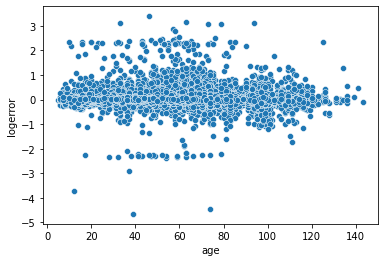

In [12]:
sns.scatterplot(x='age', y='logerror', data=df)

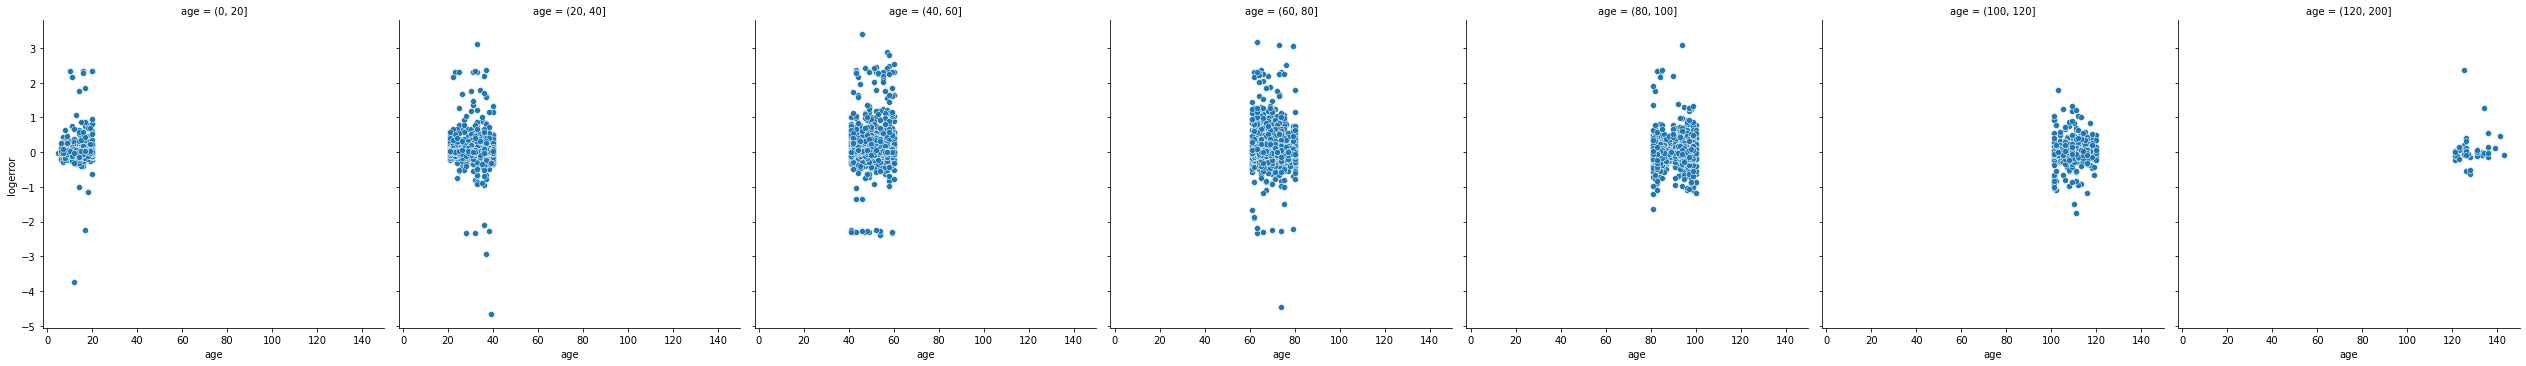

In [13]:
sns.relplot(
    data=df,
    y='logerror',
    x='age',
    col=pd.cut(df.age, bins=[0, 20, 40, 60,80,100,120,200]),
)

Things look a little tighter on either end...the 40-60 and the 60-80 look like they have a wider distribution of logerror

<AxesSubplot:xlabel='age_bin', ylabel='logerror'>

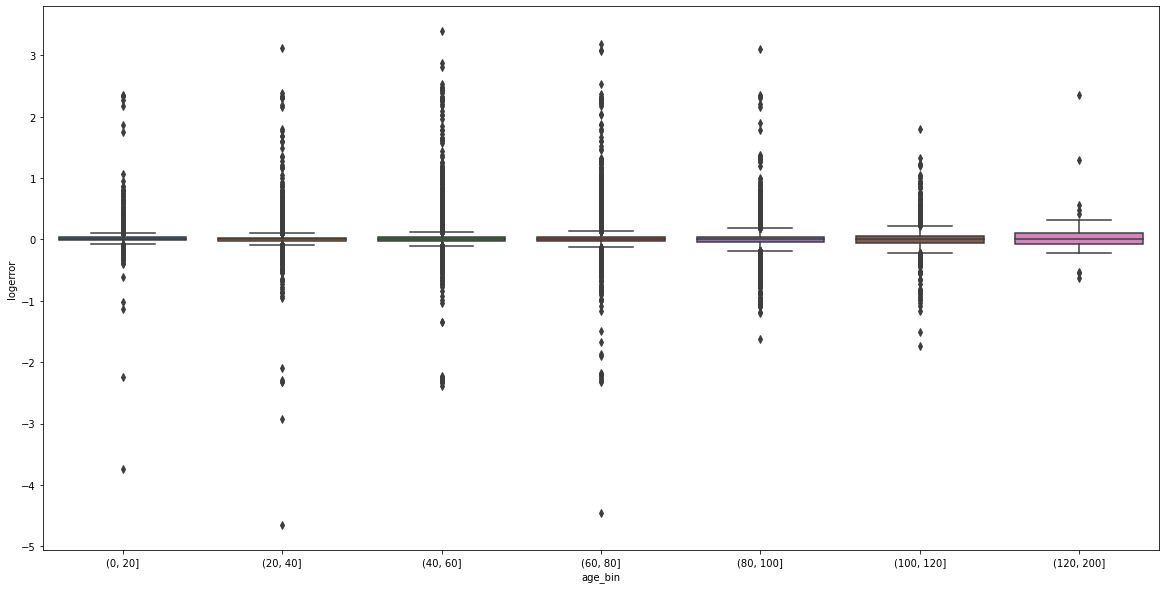

In [27]:
plt.figure(figsize=(20,10))
sns.boxplot(x='age_bin', y='logerror', data= df)

Still looks like there are more outliers in the middle, but this could be due to more data being available in those age bins

<AxesSubplot:xlabel='logerror', ylabel='Count'>

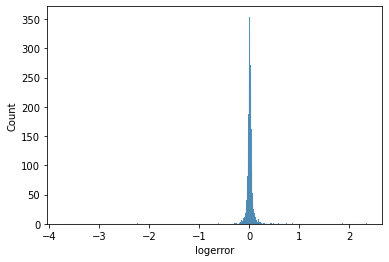

In [31]:
sns.histplot(data=df, x= df[df.age_bin == pd.Interval(0, 20)].logerror)

Text(0.5, 1.0, '120 and Up')

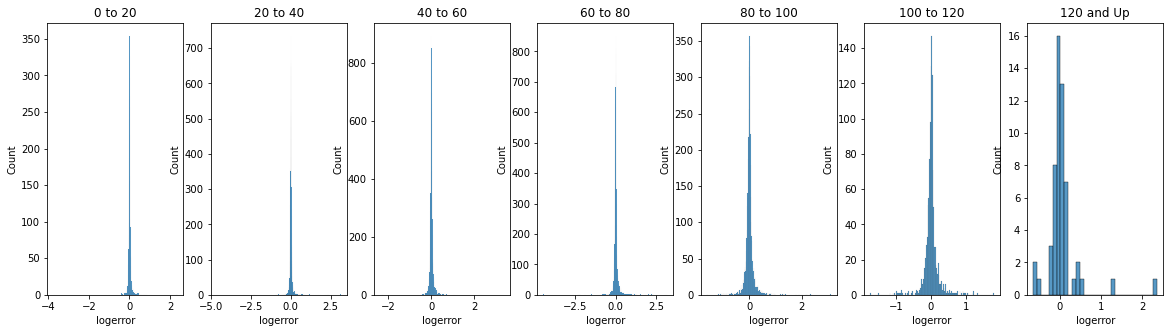

In [41]:
plt.figure(figsize=(20,5))
plt.subplot(1,7,1)
sns.histplot(data=df, x= df[df.age_bin == pd.Interval(0, 20)].logerror)
plt.title("0 to 20")
plt.subplot(1,7,2)
sns.histplot(data=df, x= df[df.age_bin == pd.Interval(20, 40)].logerror)
plt.title("20 to 40")
plt.subplot(1,7,3)
sns.histplot(data=df, x= df[df.age_bin == pd.Interval(40, 60)].logerror)
plt.title("40 to 60")
plt.subplot(1,7,4)
sns.histplot(data=df, x= df[df.age_bin == pd.Interval(60, 80)].logerror)
plt.title("60 to 80")
plt.subplot(1,7,5)
sns.histplot(data=df, x= df[df.age_bin == pd.Interval(80, 100)].logerror)
plt.title("80 to 100")
plt.subplot(1,7,6)
sns.histplot(data=df, x= df[df.age_bin == pd.Interval(100, 120)].logerror)
plt.title("100 to 120")
plt.subplot(1,7,7)
sns.histplot(data=df, x= df[df.age_bin == pd.Interval(120, 200)].logerror)
plt.title("120 and Up")

Looking at logerror by age_bin, they are generally normally distributed

Maybe run an ANOVA test to see about the variances? 

First, Levene

In [18]:
#H0: Variances are equal
#Ha: Variances are not equal

stats.levene(
    df[df.age_bin == pd.Interval(0, 20)].logerror,
    df[df.age_bin == pd.Interval(20,40)].logerror,
    df[df.age_bin == pd.Interval(40,60)].logerror,
    df[df.age_bin == pd.Interval(60,80)].logerror,
    df[df.age_bin == pd.Interval(80,100)].logerror,
    df[df.age_bin == pd.Interval(100,120)].logerror,
    df[df.age_bin == pd.Interval(120,200)].logerror
)

LeveneResult(statistic=136.4067504665052, pvalue=2.3337521676868153e-172)

The results show that the null hypothesis is rejected

In [42]:
df[df.age_bin == pd.Interval(0, 20)].logerror.var()

0.01856171983427236

In [45]:
df[df.age_bin == pd.Interval(120,200)].logerror.var()

0.16665909454391958

#### Anova testing of the logerror by age_bin

Set Hypothesis
- 𝐻0 : Population means of logerror (by age_bin) are equal
- 𝐻𝑎 : Population means of logerror (by age_bin) are not all equal

In [46]:
# This cell runs an ANOVA test on the different 'age_bins'
# We are demonstrating statistically that the age correlates to the logerror
f, p = stats.f_oneway(
    df[df.age_bin == pd.Interval(0, 20)].logerror,
    df[df.age_bin == pd.Interval(20,40)].logerror,
    df[df.age_bin == pd.Interval(40,60)].logerror,
    df[df.age_bin == pd.Interval(60,80)].logerror,
    df[df.age_bin == pd.Interval(80,100)].logerror,
    df[df.age_bin == pd.Interval(100,120)].logerror,
    df[df.age_bin == pd.Interval(120,200)].logerror
)
f, p

(8.534283466026675, 2.717833195148059e-09)

In [47]:
# Setting our alpha and returning a statemtent on the validity of the ANOVA test by comparing alpha to the resulting p-value

alpha = 0.05
if p < alpha:
    print("We reject H_O")
else:
    print("We fail to reject $H_{0}$")

We reject H_O


#### The anova test shows I can proceed with the understanding that the average logerror is different depending on the age of the home

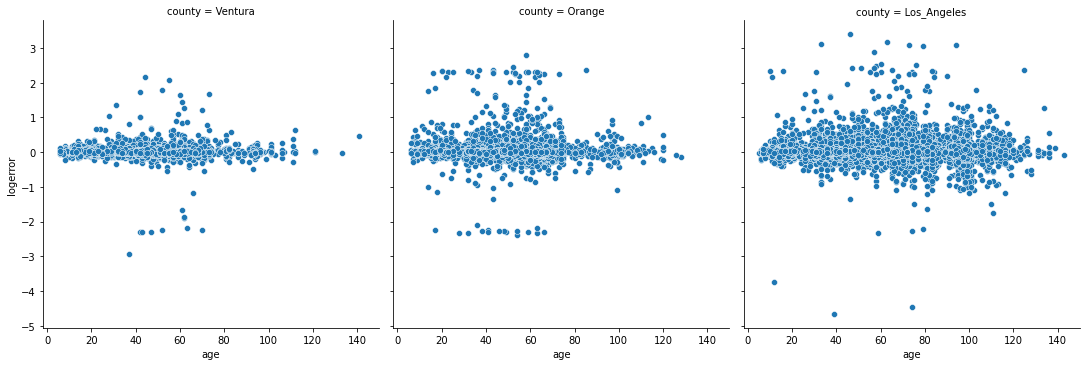

In [50]:
sns.relplot(data=df, y='logerror', x='age', col='county')

This relplot shows age and logerror by count; any dignificant differences between the counties aren't clear

### What about a relationship between tax_value and logerror? (also: are these related targets?)

<AxesSubplot:xlabel='tax_value', ylabel='logerror'>

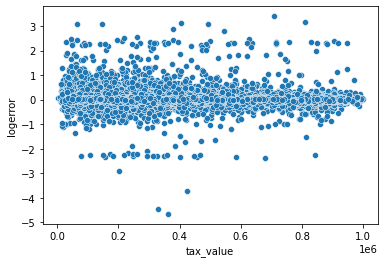

In [60]:
sns.scatterplot(x=df.tax_value, y=df.logerror, data=df)

<AxesSubplot:xlabel='tax_value', ylabel='logerror'>

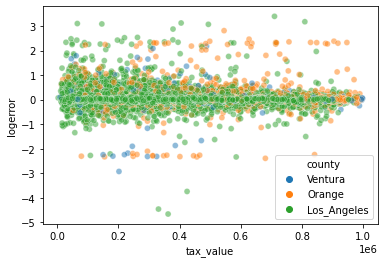

In [68]:
sns.scatterplot(x=df.tax_value, y=df.logerror, data=df, hue='county', alpha=.5)

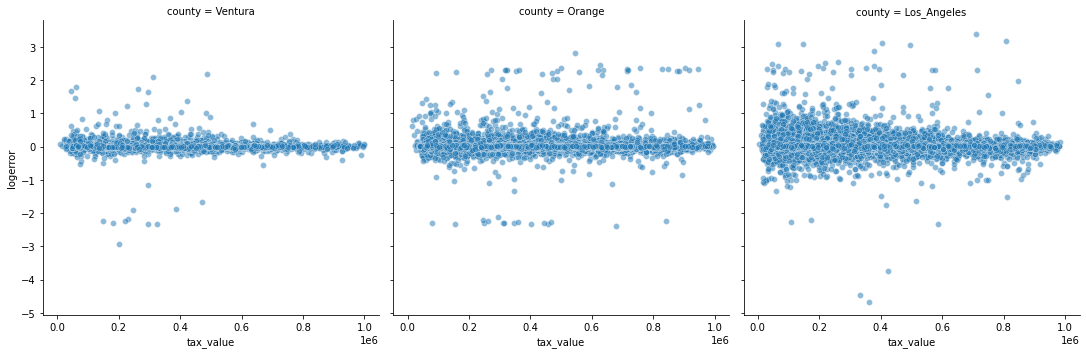

In [70]:
sns.relplot(x=df.tax_value, y=df.logerror, data=df, col='county', alpha=.5)

In [65]:
df[df.county=='Los_Angeles'].shape

(39055, 26)

In [64]:
df[df.county=='Orange'].shape

(17130, 26)

In [66]:
df[df.county=='Ventura'].shape

(5087, 26)

### No clear impressions

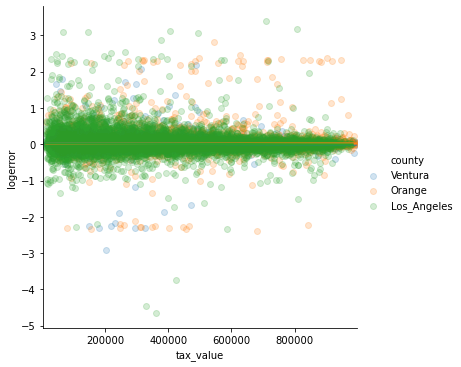

In [71]:
sns.lmplot(x='tax_value', y='logerror', data=df, scatter_kws={'alpha':.2},hue='county')

### Look like perfectly flat trend lines